In [1]:
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
import numpy as np
import pylab as pl
import pandas as pd

C:\Users\erica\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
cmtable = pd.read_csv("communities.csv", sep=',')
cmtable.head()

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,8,Lakewoodcity,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,53,Tukwilacity,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,24,Aberdeentown,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,34,Willingborotownship,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,42,Bethlehemtownship,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03


### a.Load and preprocess the data using Pandas or Numpy and, if necessary, preprocessing functions from scikit-learn. The provided data is already normalized (see description), so there is no need for additional normalization. Compute and display basic statistics (mean, standard deviation, min, max, etc.) for each of the variables in the data set. Separate the target attribute for regression.

In [3]:
#Convert otherperCap to numeric
cmtable['OtherPerCap'] = cmtable['OtherPerCap'].convert_objects(convert_numeric = True)


C:\Users\erica\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [4]:
cmtable.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
state,1994,NaN,NaN,NaN,28.6836,16.3976,1,12,34,42,56
communityname,1994,1828,Jacksonvillecity,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
population,1994,NaN,NaN,NaN,0.0575928,0.126906,0,0.01,0.02,0.05,1
householdsize,1994,NaN,NaN,NaN,0.463395,0.163717,0,0.35,0.44,0.54,1
racepctblack,1994,NaN,NaN,NaN,0.179629,0.253442,0,0.02,0.06,0.23,1
racePctWhite,1994,NaN,NaN,NaN,0.753716,0.244039,0,0.63,0.85,0.94,1
racePctAsian,1994,NaN,NaN,NaN,0.153681,0.208877,0,0.04,0.07,0.17,1
racePctHisp,1994,NaN,NaN,NaN,0.144022,0.232492,0,0.01,0.04,0.16,1
agePct12t21,1994,NaN,NaN,NaN,0.424218,0.155196,0,0.34,0.4,0.47,1
agePct12t29,1994,NaN,NaN,NaN,0.493867,0.143564,0,0.41,0.48,0.54,1


In [5]:
#Find which columns have null values
missing = pd.DataFrame(cmtable.isnull().sum(0))
missing

,0
state,0
communityname,0
population,0
householdsize,0
racepctblack,0
racePctWhite,0
racePctAsian,0
racePctHisp,0
agePct12t21,0
agePct12t29,0


In [6]:
OtherPerCap_mean = cmtable.OtherPerCap.mean()
cmtable.OtherPerCap.fillna(OtherPerCap_mean, axis=0, inplace=True)

In [7]:
cmtable.describe(include="all")

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
count,1994.000000,1994,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
unique,NaN,1828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Jacksonvillecity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,28.683551,NaN,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,...,0.022778,0.215552,0.608892,0.535050,0.626424,0.651530,0.065231,0.232854,0.161685,0.237979
std,16.397553,NaN,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,0.143564,...,0.100400,0.231134,0.204329,0.181352,0.200521,0.198221,0.109459,0.203092,0.229055,0.232985
min,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,NaN,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,...,0.000000,0.060000,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000,0.070000
50%,34.000000,NaN,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,...,0.000000,0.130000,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000,0.150000
75%,42.000000,NaN,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,...,0.000000,0.280000,0.777500,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000,0.330000


In [8]:
#Separate out target
y = np.array(cmtable.ViolentCrimesPerPop)
x = np.array(cmtable.drop(['ViolentCrimesPerPop', 'state', 'communityname'], axis = 1, inplace = False))

In [146]:
x[:10]

array([[0.19, 0.33, 0.02, 0.9 , 0.12, 0.17, 0.34, 0.47, 0.29, 0.32, 0.2 , 1.  , 0.37, 0.72, 0.34, 0.6 , 0.29, 0.15,
        0.43, 0.39, 0.4 , 0.39, 0.32, 0.27, 0.27, 0.36, 0.41, 0.08, 0.19, 0.1 , 0.18, 0.48, 0.27, 0.68, 0.23, 0.41,
        0.68, 0.4 , 0.75, 0.75, 0.35, 0.55, 0.59, 0.61, 0.56, 0.74, 0.76, 0.04, 0.14, 0.03, 0.24, 0.27, 0.37, 0.39,
        0.07, 0.07, 0.08, 0.08, 0.89, 0.06, 0.14, 0.13, 0.33, 0.39, 0.28, 0.55, 0.09, 0.51, 0.5 , 0.21, 0.71, 0.52,
        0.05, 0.26, 0.65, 0.14, 0.06, 0.22, 0.19, 0.18, 0.36, 0.35, 0.38, 0.34, 0.38, 0.46, 0.25, 0.04, 0.  , 0.12,
        0.42, 0.5 , 0.51, 0.64, 0.12, 0.26, 0.2 ],
       [0.  , 0.16, 0.12, 0.74, 0.45, 0.07, 0.26, 0.59, 0.35, 0.27, 0.02, 1.  , 0.31, 0.72, 0.11, 0.45, 0.25, 0.29,
        0.39, 0.29, 0.37, 0.38, 0.33, 0.16, 0.3 , 0.22, 0.35, 0.01, 0.24, 0.14, 0.24, 0.3 , 0.27, 0.73, 0.57, 0.15,
        1.  , 0.63, 0.91, 1.  , 0.29, 0.43, 0.47, 0.6 , 0.39, 0.46, 0.53, 0.  , 0.24, 0.01, 0.52, 0.62, 0.64, 0.63,
        0.25, 0.27, 0

 ### b.Perform standard linear regression on data using the implementation for Ch. 8 of MLA. Compute the RMSE value on the full training data. Also, plot the correlation between the predicted and actual values of the target attribute. Display the obtained regression coefficients (weights). Finally, perform 10-fold crossvalidation and compare the cross-validation RMSE to the training RMSE (for cross validation, you should use the KFoldmodule from sklearn.cross_validation)

In [9]:
# Add extra column filled with 1
x = np.array([np.concatenate((v,[1])) for v in x])

In [10]:
def standRegres(xArr,yArr):
    xMat = np.mat(xArr); yMat = np.mat(yArr).T
    xTx = xMat.T*xMat
    if np.linalg.det(xTx) == 0.0:
        print "This matrix is singular, cannot do inverse"
        return
    ws = xTx.I * (xMat.T*yMat)
    return ws

In [11]:
w = standRegres(x, y)

In [12]:
#Regression coeffients(weights
print w

[[ 1.31108068e-01]
 [-3.14114977e-02]
 [ 2.09909670e-01]
 [-4.05351612e-02]
 [-1.38892919e-02]
 [ 5.89726825e-02]
 [ 1.23399025e-01]
 [-2.22621600e-01]
 [-1.47500199e-01]
 [ 5.01635477e-02]
 [-2.42413829e-01]
 [ 4.64024392e-02]
 [-1.96945615e-01]
 [-2.06117500e-01]
 [ 4.65935490e-02]
 [-1.77212915e-01]
 [ 6.30148504e-02]
 [ 1.14942190e-02]
 [-9.08951848e-02]
 [ 2.74640044e-01]
 [ 1.01752476e-01]
 [-3.31517562e-01]
 [-2.91799268e-02]
 [-3.54483393e-02]
 [ 2.26173855e-02]
 [ 4.30950137e-02]
 [ 3.44408548e-02]
 [ 1.28412458e-01]
 [-1.91293360e-01]
 [-1.00769002e-01]
 [ 6.46856092e-02]
 [ 1.06062117e-01]
 [ 2.44125990e-06]
 [ 2.34984611e-01]
 [-3.75705330e-02]
 [-7.74957660e-03]
 [ 4.66779619e-01]
 [ 2.26295907e-01]
 [ 1.74621953e-01]
 [-5.75206227e-01]
 [-1.41954207e-01]
 [ 5.68782538e-02]
 [-3.51066745e-01]
 [-3.49493414e-02]
 [ 4.63705978e-04]
 [ 5.57016681e-02]
 [-1.82238360e-01]
 [-1.54646442e-01]
 [ 1.26172899e-01]
 [-1.44320569e-01]
 [ 2.39071713e-02]
 [ 3.33390229e-02]
 [-7.4229740

In [13]:
##Predictions
xMat = np.mat(x)
yMat=np.mat(y)
yHat = xMat*w

In [14]:
yHat.shape

(1994L, 1L)

In [15]:
print yHat[0:10]

[[ 0.16551838]
 [ 0.29062973]
 [ 0.38367799]
 [ 0.32270857]
 [-0.02129155]
 [ 0.23017938]
 [ 0.08800201]
 [ 0.4423392 ]
 [ 0.23747971]
 [ 0.00526097]]


In [16]:
err = abs(yHat.T - y)
err[:10]

matrix([[0.03448162, 0.37937027, 0.04632201, ..., 0.17142767, 0.02117355,
         0.10673053]])

In [17]:
# Dot product of error vector with itself gives us the sum of squared errors
total_error = np.dot(err,err.T)

# Compute RMSE
rmse_train = np.sqrt(total_error/len(yHat))
print rmse_train

[[0.12888961]]


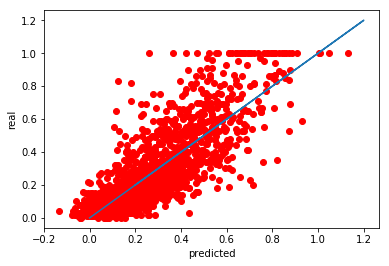

In [18]:
# Plot outputs
%matplotlib inline
pl.plot(yHat, y,'ro')
pl.plot([0,1.2,.2],[0,1.2,0.2])
pl.xlabel('predicted')
pl.ylabel('real')
pl.show()


In [19]:
#10 Fold validation
n = 10
kf = KFold(len(x), n_folds=n)
xval_err = 0
for train,test in kf:
    w = standRegres(x, y) 
    xMat = np.mat(x)
    yMat = np.mat(y)
    yHat = xMat*w
    err = abs(yHat.T - y)
    xval_err += (np.dot(err,err.T))
       
rmse_10cv = np.sqrt(xval_err/len(yHat))
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

RMSE on training: 0.1289
RMSE on 10-fold CV: 0.4076


### c.Feature Selection: use the scikit-learn regression model from sklearn.linear_model with a subset of features to perform linear regression. For feature selection, write a script or function that takes as input the training data, target variable; the model; and any other parameters you find necessary, and returns the optimal percentage of the  on the training data (you can use k=5). Your approach should use k-fold crossvalidation on the training data (you can use k=5). You can use feature_selection.SelectPercentile to find the most informative variables. Show the list of most informative variables and their weights [

In [48]:
#Split into training and test sets
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 33)
cmtable_x = cmtable.drop(['ViolentCrimesPerPop', 'state', 'communityname'], axis = 1, inplace = False)

C:\Users\erica\Anaconda2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: divide by zero encountered in divide
  corr /= X_norms
C:\Users\erica\Anaconda2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:303: RuntimeWarning: invalid value encountered in divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
C:\Users\erica\Anaconda2\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\erica\Anaconda2\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\erica\Anaconda2\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\erica\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring met

1 0.11287401163402822
6 0.09943268475677307
11 0.09900510519125442
16 0.0990905907952681
21 0.0975068622131086
26 0.09534915043594905
31 0.09492194643289374
36 0.09474955355002232
41 0.09435370428857698
46 0.09466441760571027
51 0.09505109356109846
56 0.0954257382389749
61 0.09574483254772759
66 0.09563045814358936


C:\Users\erica\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\erica\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\erica\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\erica\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\erica\Anaconda2

71 0.09583132229767206
76 0.09516847723448739
81 0.09548089347790065
86 0.09516368543611166
91 0.09531463100110918
96 0.09533345047381277


C:\Users\erica\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


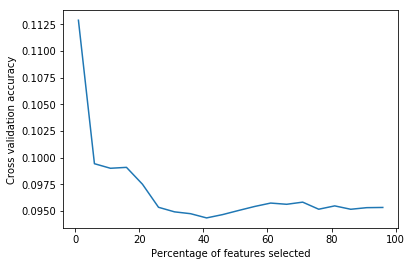

In [21]:
from sklearn import feature_selection
from sklearn import cross_validation

linreg = LinearRegression()

percentiles = range(1, 100, 5)
results = []
for i in range(1, 100, 5):
    fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=i)
    x_train_fs = fs.fit_transform(x_train, y_train)
    scores = abs(cross_validation.cross_val_score(linreg, x_train_fs, y_train, cv=5, scoring='mean_absolute_error'))    
    print i, scores.mean()
    results = np.append(results, scores.mean())

##optimal_percentile = np.where(results == results.max())[0]
#print "Optimal percentile of features:{0}".format(percentiles[optimal_percentile]), "\n"
##optimal_num_features = int(percentiles[optimal_percentile]*len(cmtable_x.columns)/100)
#print "Optimal number of features:{0}".format(optimal_num_features), "\n"

# Plot percentile of features VS. cross-validation scores
import pylab as pl
pl.figure()
pl.xlabel("Percentage of features selected")
pl.ylabel("Cross validation accuracy")
pl.plot(percentiles,results)

In [22]:
optimal_percentile = np.where(results == results.max())[0]
print "Optimal percentile of features:{0}".format(percentiles[optimal_percentile]), "\n"
optimal_num_features = int(percentiles[optimal_percentile]*len(cmtable_x.columns)/100)
print "Optimal number of features:{0}".format(optimal_num_features), "\n"

TypeError: only integer scalar arrays can be converted to a scalar index

In [23]:
## since I am getting an error for optimal num features, i will estimate that the optimal num of features 
# is about 45 (based on the graph)
fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile = 45)
x_train_fs = fs.fit_transform(x_train, y_train)

for i in range(len(cmtable_x.columns.values)):
    if fs.get_support()[i]:
        print cmtable_x.columns.values[i],'\t\t', fs.scores_[i]

population 		256.0323547372119
racepctblack 		1074.8895092675182
racePctWhite 		1412.5078123926182
numbUrban 		247.77613854814769
medIncome 		341.63253752319906
pctWWage 		161.57075094157008
pctWInvInc 		756.0149723312603
pctWPubAsst 		784.5706408092585
medFamInc 		366.90042184405735
perCapInc 		214.99315799069268
NumUnderPov 		400.3078568907944
PctPopUnderPov 		578.817365213762
PctLess9thGrade 		319.21810810192477
PctNotHSGrad 		472.19620786905836
PctBSorMore 		173.3668431842858
PctUnemployed 		533.9131521991949
PctEmploy 		190.4652624638389
MalePctDivorce 		602.7748935815926
MalePctNevMarr 		161.07842259577544
FemalePctDiv 		704.7727390048145
TotalPctDiv 		693.1378303821931
PctFam2Par 		1657.8650169982202
PctKids2Par 		1972.804063866535
PctYoungKids2Par 		1342.1736137876028
PctTeen2Par 		1299.535105842697
NumIlleg 		431.63556026913983
PctIlleg 		1936.1208737826942
NumImmig 		151.62332311317383
PctNotSpeakEnglWell 		144.66400533878237
PctLargHouseFam 		241.23381636030092
PctPersOwnOcc

In [24]:
from sklearn.metrics import mean_squared_error

In [25]:
fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile = 45)
x_train_fs = fs.fit_transform(x_train, y_train)
linreg.fit(x_train_fs, y_train)
x_test_fs = fs.transform(x_test)
pred = linreg.predict(x_test_fs)
linreg_err = mean_squared_error(y_test, pred)

print "MAE of testing data is %0.8f" % linreg_err

MAE of testing data is 0.02116030


### d.Next, perform Ridge Regression and Lasso Regression using the modules from sklearn.linear_model.

In [26]:
cm = pd.read_csv("communities.csv", sep=',')
cm['OtherPerCap'] = cm['OtherPerCap'].convert_objects(convert_numeric = True)
OtherPerCap_mean = cm.OtherPerCap.mean()
cm.OtherPerCap.fillna(OtherPerCap_mean, axis=0, inplace=True)

cm_x = cm.drop(['state', 'communityname', 'ViolentCrimesPerPop'], axis = 1, inplace = False)
cm_y = cm['ViolentCrimesPerPop']

C:\Users\erica\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [27]:
cm_x.shape

(1994, 97)

In [28]:
cm_y.shape

(1994L,)

In [29]:
x_var = np.array(cm_x)
x_var = np.array([np.concatenate((v,[1])) for v in x_var])
y_var = np.array(cm_y)

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x_var, y_var, test_size = 0.2, random_state = 33)

In [31]:
from sklearn.cross_validation import KFold
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
%matplotlib inline

def calc_params(x, y, param_name, param_values, K, model):
    
    # Convert input to Numpy arrays
    x = np.array(x)
    y = np.array(y)

    # initialize training and testing scores with zeros
    train_scores = np.zeros(len(param_values))
    test_scores = np.zeros(len(param_values))
    
    # iterate over the different parameter values
    for i, param_value in enumerate(param_values):
        
        # set classifier parameters
        model.set_params(**{param_name:param_value})
        
        # initialize the K scores obtained for each fold
        k_train_scores = np.zeros(K)
        k_test_scores = np.zeros(K)
        
        # create KFold cross validation
        cv = KFold(len(x), K, shuffle=True, random_state=0)
        
        # iterate over the K folds
        for j, (train, test) in enumerate(cv):
            # fit the classifier in the corresponding fold
            # and obtain the corresponding accuracy scores on train and test sets
            model.fit([x[k] for k in train], y[train])
            train_predict = model.predict(x[train])
            test_predict = model.predict(x[test])
            
            k_train_scores = mean_absolute_error(y[train], train_predict)
            k_test_scores = mean_absolute_error(y[test], test_predict)
            
        # store the mean of the K fold scores
        train_scores[i] = np.mean(k_train_scores)
        test_scores[i] = np.mean(k_test_scores)
       
    # plot the training and testing scores in a log scale
    plt.plot(param_values, train_scores, label='Train', alpha=0.4, lw=2, c='b')
    plt.plot(param_values, test_scores, label='Test', alpha=0.4, lw=2, c='g')
    plt.legend(loc=7)
    plt.xlabel(param_name + " values")
    plt.ylabel("Mean Cross Validation Error")
    
    min_err_idx = np.where(test_scores == test_scores.min())
    min_err_alpha = param_values[min_err_idx]
    print 'The minimum MAE using cross validation is:', test_scores[min_err_idx][0],'with', param_name,':', min_err_alpha[0]

In [32]:
alpha = np.linspace(0.01, 100, 100)
alpha = np.array([float(e) for e in alpha])
print alpha

[1.000e-02 1.020e+00 2.030e+00 3.040e+00 4.050e+00 5.060e+00 6.070e+00
 7.080e+00 8.090e+00 9.100e+00 1.011e+01 1.112e+01 1.213e+01 1.314e+01
 1.415e+01 1.516e+01 1.617e+01 1.718e+01 1.819e+01 1.920e+01 2.021e+01
 2.122e+01 2.223e+01 2.324e+01 2.425e+01 2.526e+01 2.627e+01 2.728e+01
 2.829e+01 2.930e+01 3.031e+01 3.132e+01 3.233e+01 3.334e+01 3.435e+01
 3.536e+01 3.637e+01 3.738e+01 3.839e+01 3.940e+01 4.041e+01 4.142e+01
 4.243e+01 4.344e+01 4.445e+01 4.546e+01 4.647e+01 4.748e+01 4.849e+01
 4.950e+01 5.051e+01 5.152e+01 5.253e+01 5.354e+01 5.455e+01 5.556e+01
 5.657e+01 5.758e+01 5.859e+01 5.960e+01 6.061e+01 6.162e+01 6.263e+01
 6.364e+01 6.465e+01 6.566e+01 6.667e+01 6.768e+01 6.869e+01 6.970e+01
 7.071e+01 7.172e+01 7.273e+01 7.374e+01 7.475e+01 7.576e+01 7.677e+01
 7.778e+01 7.879e+01 7.980e+01 8.081e+01 8.182e+01 8.283e+01 8.384e+01
 8.485e+01 8.586e+01 8.687e+01 8.788e+01 8.889e+01 8.990e+01 9.091e+01
 9.192e+01 9.293e+01 9.394e+01 9.495e+01 9.596e+01 9.697e+01 9.798e+01
 9.899

In [33]:
ridge = Ridge()
lasso = Lasso()

The minimum MAE using cross validation is: 0.09570498426140558 with alpha : 3.04


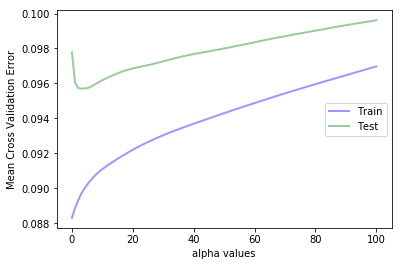

In [34]:
calc_params(x_train, y_train, "alpha",alpha, 5, ridge)

In [35]:
ridge = Ridge(fit_intercept = True, alpha = 3.025)
ridge.fit(x_train, y_train)

pred = ridge.predict(x_test)
MAE = mean_squared_error(y_test, pred)
print 'The MAE on the test data is : %0.8f' %MAE

The MAE on the test data is : 0.02076758


The minimum MAE using cross validation is: 0.10903301648056468 with alpha : 0.01


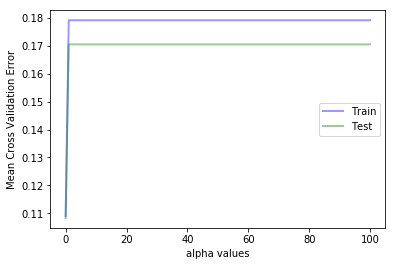

In [36]:
calc_params(x_train, y_train, "alpha",alpha, 5, lasso)

In [37]:
lasso = Lasso(fit_intercept = True, alpha = 0.01)
lasso.fit(x_train, y_train)

pred = lasso.predict(x_test)
MAE = mean_squared_error(y_test, pred)
print 'The MAE on the test data is : %0.8f' %MAE

The MAE on the test data is : 0.02698041


For Ridge, we got the minimum MAE of 0.0957 using cross-val when  alpha = 3.024.  You can see from the graph that when alpha is greater than 3.024 the MAE is increasing.  In the test set, the MAE is decreasing until it hits and alpha equal to 3.04.  

For Lasso, we got a minimum MAE of 0.109 using cross- val when alhpa = 0.01. When alpha is greater than 0.01 the MAE stays the same for both test and train data, so alhpa = 0.01 will produce the best model.

The Ridge and Lasso methods both produced similar MAE arouns 0.02.  However, Ridge was 0.0207 which Lasso was 0.026. Since Ridge is slightly lower MAE this would be the better model.

### e.Next, perform regression using Stochastic Gradient Descent for regression.

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.grid_search import GridSearchCV

# Standardize the data
scaler = StandardScaler()
scaler.fit(x_var)
x_s = scaler.transform(x_var)

x_train, x_test, y_train, y_test = train_test_split(x_s, y_var, test_size = 0.2, random_state = 33)

sgdreg = SGDRegressor()

parameters = {
    'penalty': ['l2','l1'],
    'alpha': np.linspace(0.0001, 200, 400)   
}

gs = GridSearchCV(sgdreg, parameters, verbose = 1, cv =5)

C:\Users\erica\Anaconda2\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [41]:
%time _ = gs.fit(x_train, y_train)

gs.best_params_, gs.best_score_

Fitting 5 folds for each of 800 candidates, totalling 4000 fits


C:\Users\erica\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Wall time: 22.9 s


[Parallel(n_jobs=1)]: Done 4000 out of 4000 | elapsed:   22.8s finished


({'alpha': 0.0001, 'penalty': 'l1'}, 0.6470658743929482)

In [45]:
# apply model using the best parameters
sgdreg = SGDRegressor(penalty = 'l1', alpha = 0.0001, n_iter=300)
sgdreg.fit(x_train, y_train)
p = sgdreg.predict(x_test)
MAE = mean_squared_error(y_test, pred)

print 'The MAE using Stochastic Gradient Descent on the test data is : %0.8f' %MAE

C:\Users\erica\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


The MAE using Stochastic Gradient Descent on the test data is : 0.02698041


The minimum MAE using cross validation is: 0.09471233394223995 with l1_ratio : 0.6464353535353535


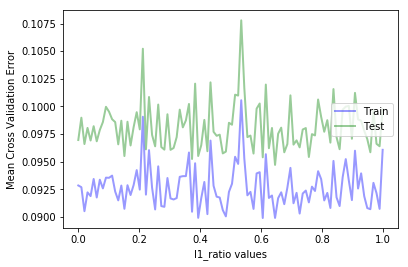

In [46]:
# Model selection to find the best "l1_ratio" parameter
l1_range = np.linspace(0.0001, .9999, 100)   

sgd = SGDRegressor(penalty = 'elasticnet')
calc_params(x_train, y_train, "l1_ratio", l1_range, 5, sgd)

In [47]:
# Using thse best parameters

sgd = SGDRegressor(penalty = 'elasticnet', l1_ratio = 0.6464353535353535)
sgdreg.fit(x_train, y_train)
p = sgdreg.predict(x_test)
MAE = mean_squared_error(y_test, pred)
print 'The MAE using Stochastic Gradient Descent with elasticnet penalty on the test data is : %0.8f' %MAE

C:\Users\erica\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


The MAE using Stochastic Gradient Descent with elasticnet penalty on the test data is : 0.02698041


The MAE using penalty l1 and alpha of 0.0001 is 0.0269.  This is the same as using the elasticnet penalty and l1 ratio of 0.6464. 

Out of all of the models, the Lasso and Stocastic Gradient produce the best MAE value around 0.02.